In [1]:
import praw
import datetime

reddit = praw.Reddit(
    client_id="d6PhF1j_wq2xvhOWhpZ7kA",
    client_secret="dmFNcPLk1XsMlP1tsqvaNAki-pOjNw",
    password="Elaine-xgz@0309",
    user_agent="my user agent for college project, by Xinwei",
    username="Born-Medicine-4623"
)
reddit.read_only = True

In [30]:
for submission in reddit.subreddit("all").controversial(time_filter="month",limit=10):
    print(submission.title)
    print("https://www.reddit.com" + submission.permalink)
    print("-" * 50)  

AIO My partner decided to end things because I'm sick and they drained our accounts before leaving...
https://www.reddit.com/r/AmIOverreacting/comments/1la0hoe/aio_my_partner_decided_to_end_things_because_im/
--------------------------------------------------
Just tipped 0% on a $500 dinner
https://www.reddit.com/r/EndTipping/comments/1lhggnw/just_tipped_0_on_a_500_dinner/
--------------------------------------------------
I want to promote queer creators!
https://www.reddit.com/r/2007scape/comments/1l8r64e/i_want_to_promote_queer_creators/
--------------------------------------------------
Giving children unrestricted internet access isn’t a bad thing
https://www.reddit.com/r/The10thDentist/comments/1lmyobt/giving_children_unrestricted_internet_access_isnt/
--------------------------------------------------
To the rioters
https://www.reddit.com/r/SeattleWA/comments/1l9iloo/to_the_rioters/
--------------------------------------------------
Thank you Trump! Made it before 50 yo
https://

In [29]:
# time_filter=
# "all" → all (it's too slow to get data by using this filter)
# "year" → last year
# "month" → last 30 days
# "week" → last 7 days
# "day" → last 24 hours


# .hot() 
# .new() 
# .top() 
# .controversial() 
# .rising() 
# .random() 

submission = next(reddit.subreddit("all").controversial(time_filter="month", limit=1))

submission.comments.replace_more(limit=None)

all_comments = []
id = 0
for comment in submission.comments.list():
    created = comment.created_utc
    dt = datetime.datetime.fromtimestamp(created)
    # print(comment.body)
    # print("Created Time:", dt)    

    all_comments.append({'id':id, 'body':comment.body,'created_dt':dt})
    id += 1


print("Title:", submission.title)
print("URL:", "https://www.reddit.com" + submission.permalink)
for item in all_comments:
    print(item)

Title: AIO My partner decided to end things because I'm sick and they drained our accounts before leaving...
URL: https://www.reddit.com/r/AmIOverreacting/comments/1la0hoe/aio_my_partner_decided_to_end_things_because_im/
{'id': 0, 'body': 'Leaving you at your lowest has to be the biggest backstabbing ever wth', 'created_dt': datetime.datetime(2025, 6, 12, 19, 2, 48)}
{'id': 1, 'body': 'Bro what the fuck what a cunt', 'created_dt': datetime.datetime(2025, 6, 12, 19, 0, 29)}
{'id': 2, 'body': "I hate to be the one that screams fake, but it's incredibly weird to me that you and your spouse have the exact same texting style. It's almost as if it's the same person texting themselves. It's also strange to me that someone would just up and leave their family, friends and career behind for someone in another country this soon, although I'm aware it does happen. The OP's replies also seem surface level, and why even post here asking if they're overreacting? Clearly they wouldn't be if their par

In [3]:
len(all_comments)

1704

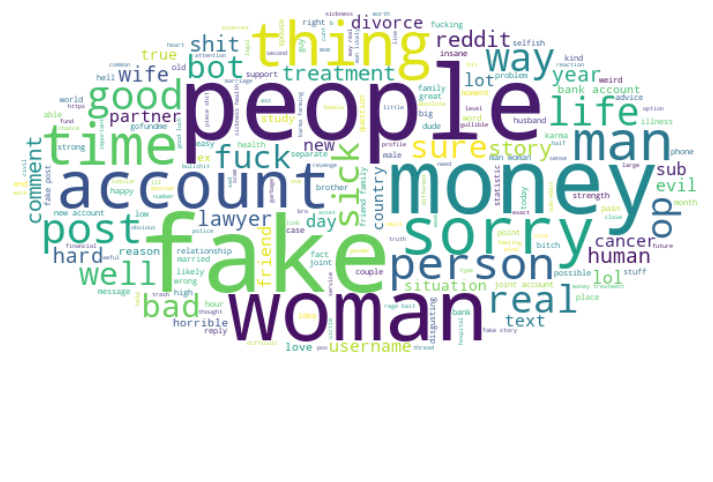

In [4]:
import numpy as np
from PIL import Image
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# load spacy
nlp = spacy.load(r".\en_core_web_sm\en_core_web_sm-3.8.0")

text_list = []
for item in all_comments:
    text_list.append(item['body'])

text = ' '.join(text_list)


# retaining only nouns/adj
doc = nlp(text)
words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ in ["NOUN", "ADJ"]]

# ellipse mask
x, y = np.ogrid[:400, :600]  # height/width
mask = (x - 150)**2 / 150**2 + (y - 300)**2 / 300**2 > 1
mask = 255 * mask.astype(int)

# Generate word cloud (remove outer frame)
wordcloud = WordCloud(
    background_color='white',
    mask=mask,
    width=600,
    height=300
).generate(" ".join(words))

# display
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# initialize VADER
analyzer = SentimentIntensityAnalyzer()
results = []
id = 0


for comment in text_list:
    score = analyzer.polarity_scores(comment)
    results.append({
        'id' : id,
        "comment": comment,
        "neg": score["neg"],
        "neu": score["neu"],
        "pos": score["pos"],
        "compound": score["compound"],
        "create_dt": all_comments[id]['created_dt']
    })
    id += 1

df = pd.DataFrame(results)

In [6]:
df

,id,comment,neg,neu,pos,compound,create_dt
0,0,Leaving you at your lowest has to be the bigge...,0.353,0.647,0.000,-0.7184,2025-06-12 19:02:48
1,1,Bro what the fuck what a cunt,0.573,0.427,0.000,-0.7717,2025-06-12 19:00:29
2,2,"I hate to be the one that screams fake, but it...",0.202,0.754,0.045,-0.9753,2025-06-12 19:47:06
3,3,Unfortunately people leaving when their partne...,0.250,0.737,0.013,-0.9685,2025-06-12 19:12:45
4,4,"Okay, so this story is obviously fake because ...",0.069,0.825,0.106,0.8747,2025-06-12 20:20:14
...,...,...,...,...,...,...,...
1699,1699,Because that person wasn’t saying that either....,0.102,0.828,0.071,-0.5824,2025-06-12 23:09:10
1700,1700,"I checked the reverse image, as well, and didn...",0.000,0.778,0.222,0.9504,2025-06-13 04:15:17
1701,1701,He called me a troll when that was the *furthe...,0.000,0.839,0.161,0.3182,2025-06-12 22:54:58
1702,1702,"Maybe its just a ploy to get money or ""karma"" ...",0.000,0.922,0.078,0.3769,2025-06-12 23:11:24


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         1704 non-null   int64         
 1   comment    1704 non-null   object        
 2   neg        1704 non-null   float64       
 3   neu        1704 non-null   float64       
 4   pos        1704 non-null   float64       
 5   compound   1704 non-null   float64       
 6   create_dt  1704 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 93.3+ KB


In [8]:
df.describe()

,id,neg,neu,pos,compound,create_dt
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704
mean,851.500000,0.178749,0.708528,0.112718,-0.106522,2025-06-12 22:11:39.774648064
min,0.000000,0.000000,0.000000,0.000000,-0.989900,2025-06-12 18:58:37
25%,425.750000,0.000000,0.597750,0.000000,-0.569600,2025-06-12 20:01:21.750000128
50%,851.500000,0.132000,0.725000,0.071000,-0.004550,2025-06-12 21:06:11
75%,1277.250000,0.262000,0.850000,0.177000,0.300050,2025-06-12 23:36:43.249999872
max,1703.000000,1.000000,1.000000,1.000000,0.996000,2025-06-13 06:33:27
std,492.046746,0.201685,0.216618,0.144272,0.537296,NaN


In [9]:
df.isnull().sum()

id           0
comment      0
neg          0
neu          0
pos          0
compound     0
create_dt    0
dtype: int64

In [10]:
# deleted is deleted by the writer, romoved is deleted by the admin
df[(df['comment']=='[deleted]') | (df['comment']=='[removed]')] 

,id,comment,neg,neu,pos,compound,create_dt
222,222,[deleted],0.0,1.0,0.0,0.0,2025-06-12 19:49:12
857,857,[removed],0.0,1.0,0.0,0.0,2025-06-12 18:58:37
865,865,[deleted],0.0,1.0,0.0,0.0,2025-06-12 19:18:03
882,882,[deleted],0.0,1.0,0.0,0.0,2025-06-12 20:04:51
1066,1066,[deleted],0.0,1.0,0.0,0.0,2025-06-12 19:45:18
1207,1207,[deleted],0.0,1.0,0.0,0.0,2025-06-12 19:46:56
1318,1318,[deleted],0.0,1.0,0.0,0.0,2025-06-13 01:44:31
1365,1365,[deleted],0.0,1.0,0.0,0.0,2025-06-12 19:26:46
1486,1486,[removed],0.0,1.0,0.0,0.0,2025-06-12 20:37:43
1623,1623,[deleted],0.0,1.0,0.0,0.0,2025-06-12 21:46:43


In [11]:
df = df[~((df['comment'] == '[deleted]') | (df['comment'] == '[removed]'))]

In [12]:
df[(df['comment']=='[deleted]') | (df['comment']=='[removed]')] 

,id,comment,neg,neu,pos,compound,create_dt


In [13]:
df = pd.DataFrame(results)
# ensure create_dt type is datetime 
df['create_dt'] = pd.to_datetime(df['create_dt'])
# create datetime index
df.set_index('create_dt', inplace=True)
df = df.sort_index()

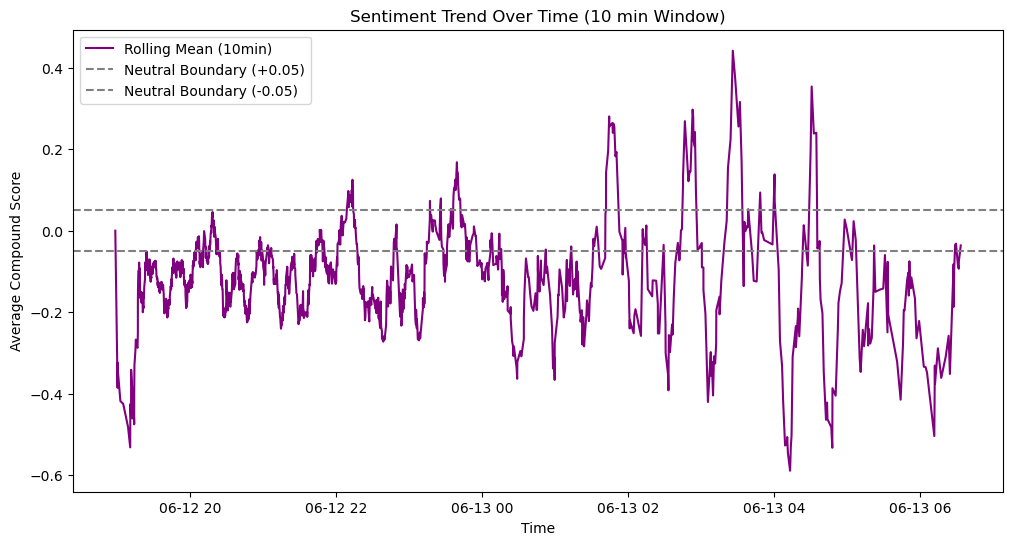

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Make a sliding window for 10 minutes
t='10min'
rolling = df['compound'].rolling(t).mean()

# drawing
plt.figure(figsize=(12,6))
plt.plot(rolling.index, rolling, color='purple', label=f'Rolling Mean ({t})')


# add Neutral Boundary line
plt.axhline(y=0.05, color='grey', linestyle='--', label='Neutral Boundary (+0.05)')
plt.axhline(y=-0.05, color='grey', linestyle='--', label='Neutral Boundary (-0.05)')


plt.xlabel('Time')
plt.ylabel('Average Compound Score')
plt.title('Sentiment Trend Over Time (10 min Window)')
plt.legend()
plt.show()





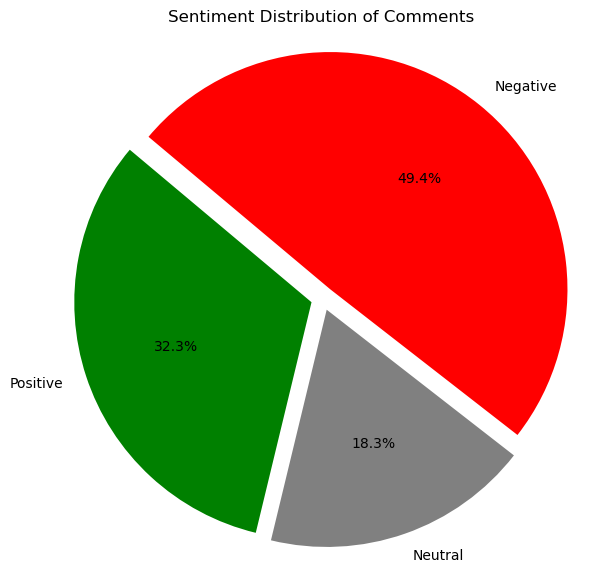

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def get_sentiment_label(compound):
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['compound'].apply(get_sentiment_label)

sentiment_counts = df['sentiment'].value_counts()


sentiment_counts = sentiment_counts.reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)


colors = ["green", "gray", "red"]  

plt.figure(figsize=(7, 7))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct="%1.1f%%",
    colors=colors,
    startangle=140,
    explode=(0.05, 0.05, 0.05)
)
plt.title("Sentiment Distribution of Comments")
plt.axis('equal')
plt.show()



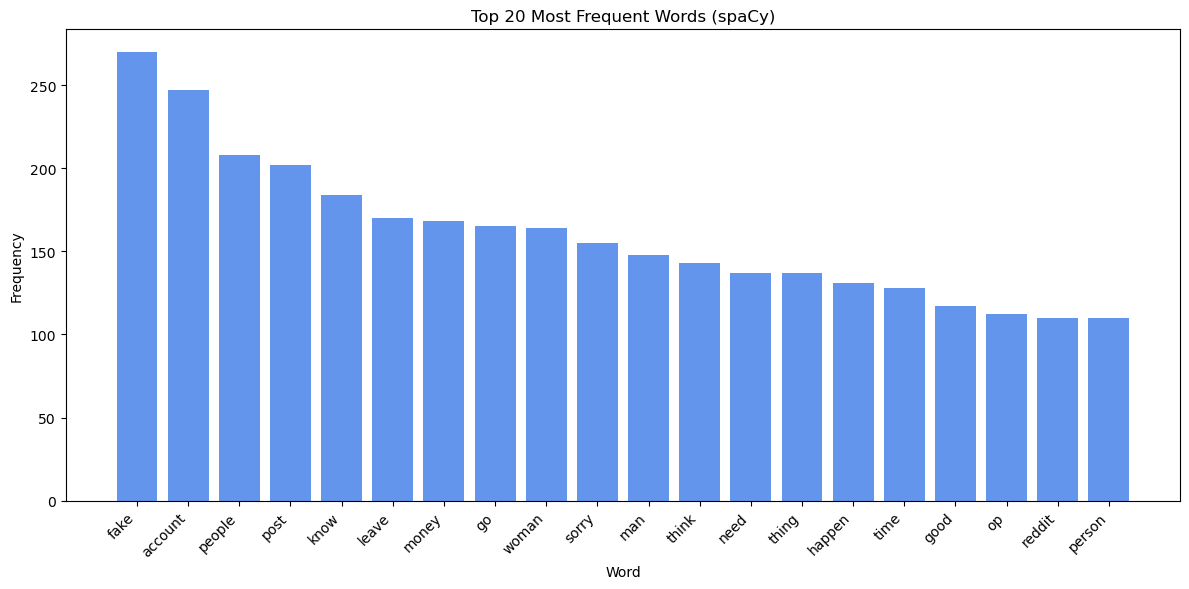

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import spacy
import en_core_web_sm

# nlp = en_core_web_sm.load()

all_text = " ".join(df['comment'].astype(str).tolist()).lower()


doc = nlp(all_text)

# summary noun / adj / verb
tokens = [
    token.lemma_   # Use the lemmatized form of the word (e.g., "running" → "run")
    for token in doc
    if not token.is_stop  # Exclude stopwords like "the", "is", "and"
       and token.is_alpha # Keep only alphabetic tokens (exclude punctuation and numbers)
       and token.pos_ in ["NOUN", "ADJ", "VERB"]  # Keep only nouns, adjectives, and verbs
]


word_counts = Counter(tokens)
top_n = 20  # Top 20 words
top_words = word_counts.most_common(top_n)


words, counts = zip(*top_words)


plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='cornflowerblue')
plt.xticks(rotation=45, ha='right')
plt.title(f'Top {top_n} Most Frequent Words (spaCy)')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


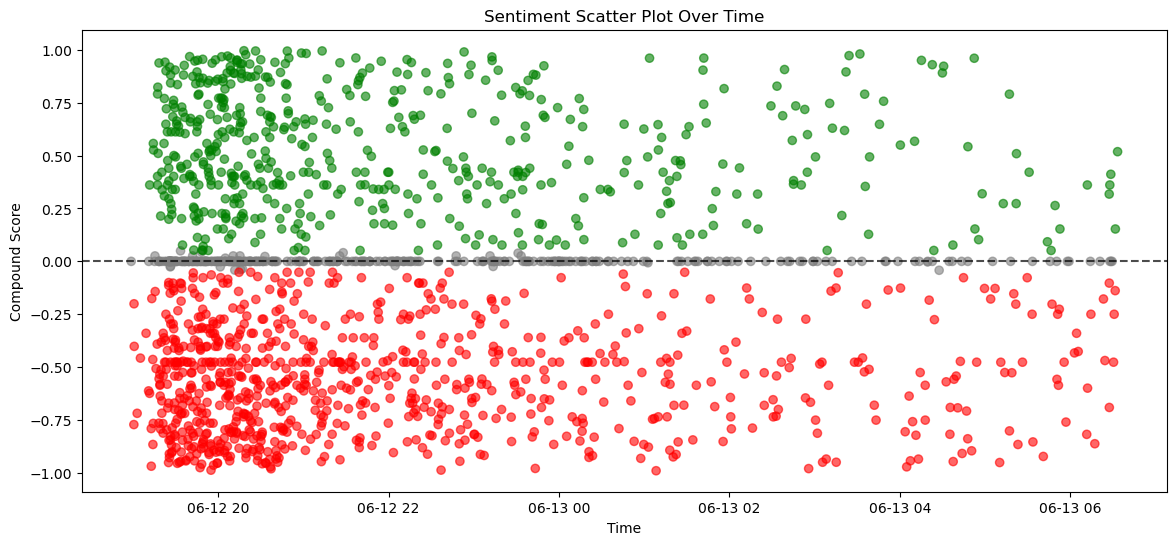

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(results)


df['sentiment'] = df['compound'].apply(get_sentiment_label)

# 颜色映射
color_map = {"Positive": "green", "Neutral": "gray", "Negative": "red"}
colors = df['sentiment'].map(color_map)

# 画散点
plt.figure(figsize=(14, 6))
plt.scatter(df['create_dt'], df['compound'], c=colors, alpha=0.6)

# 画 0 分界线
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)

plt.title("Sentiment Scatter Plot Over Time")
plt.xlabel("Time")
plt.ylabel("Compound Score")
plt.show()


In [21]:
print(df.columns)

Index(['id', 'comment', 'neg', 'neu', 'pos', 'compound', 'create_dt',
       'sentiment'],
      dtype='object')


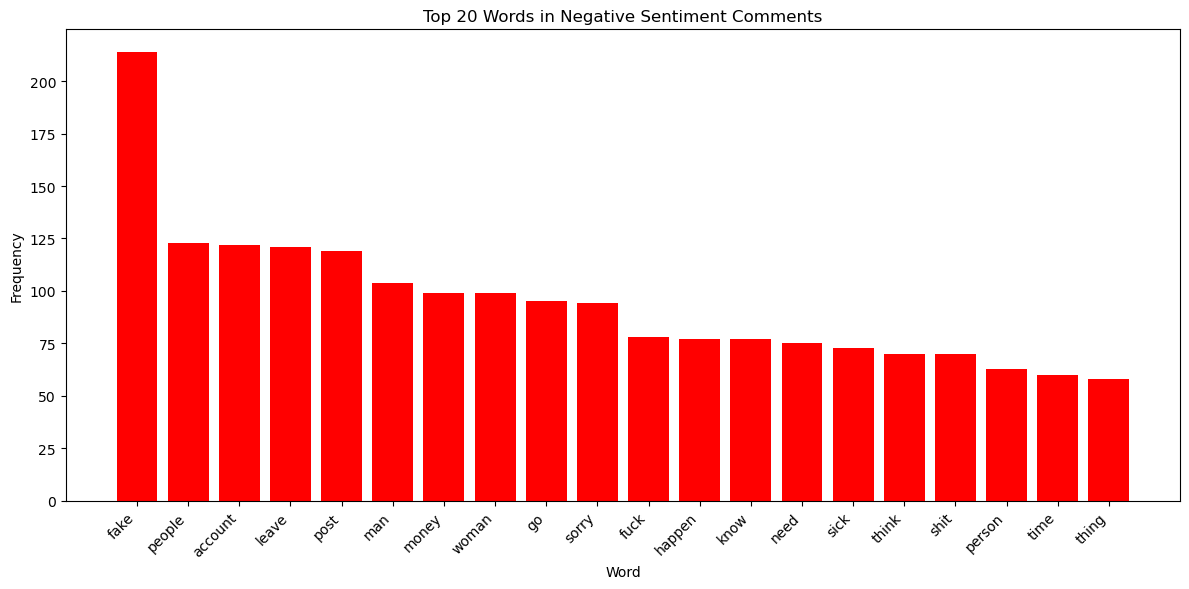

In [22]:

from collections import Counter

df_neg = df[df['compound'] <= -0.05]

all_neg_text = " ".join(df_neg['comment'].astype(str).tolist()).lower()
doc = nlp(all_neg_text)

# 举例：只要形容词 + 名词 + 动词
tokens = [
    token.lemma_
    for token in doc
    if not token.is_stop and token.is_alpha and token.pos_ in ['NOUN', 'ADJ', 'VERB']
]

# 统计词频
word_counts = Counter(tokens)
top_neg = word_counts.most_common(20)

words, counts = zip(*top_neg)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='red')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Words in Negative Sentiment Comments')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


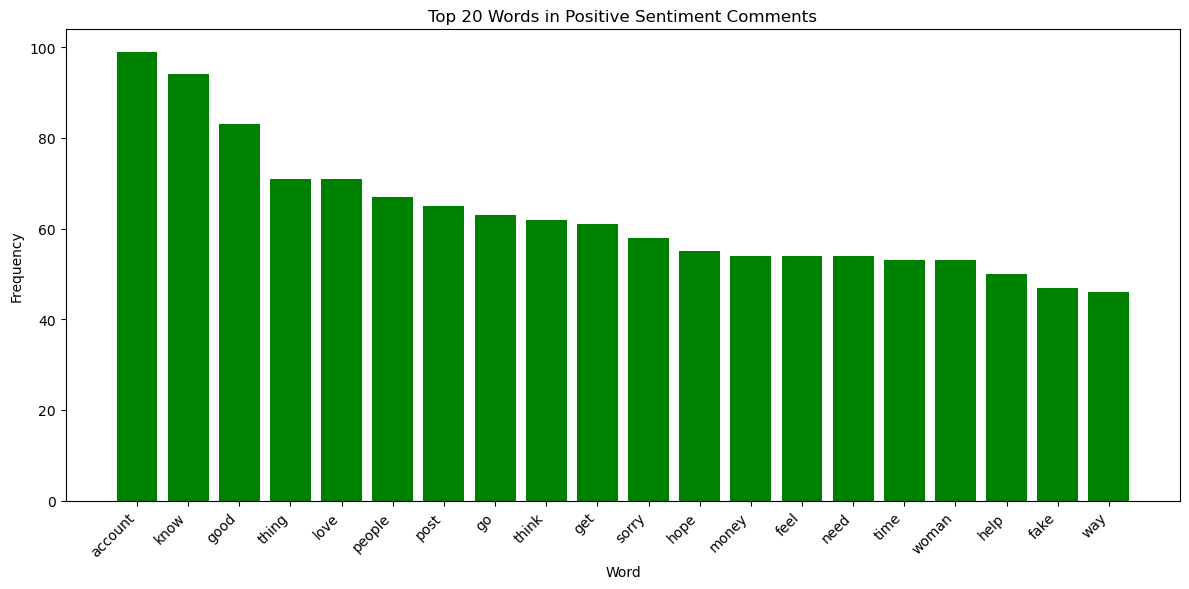

In [23]:

from collections import Counter

df_pos = df[df['compound'] >= 0.05]

all_pos_text = " ".join(df_pos['comment'].astype(str).tolist()).lower()
doc = nlp(all_pos_text)

# 举例：只要形容词 + 名词 + 动词
tokens = [
    token.lemma_
    for token in doc
    if not token.is_stop and token.is_alpha and token.pos_ in ['NOUN', 'ADJ', 'VERB']
]

# 统计词频
word_counts = Counter(tokens)
top_pos = word_counts.most_common(20)

words, counts = zip(*top_pos)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='green')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Words in Positive Sentiment Comments')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [24]:
print(df.columns)


Index(['id', 'comment', 'neg', 'neu', 'pos', 'compound', 'create_dt',
       'sentiment'],
      dtype='object')


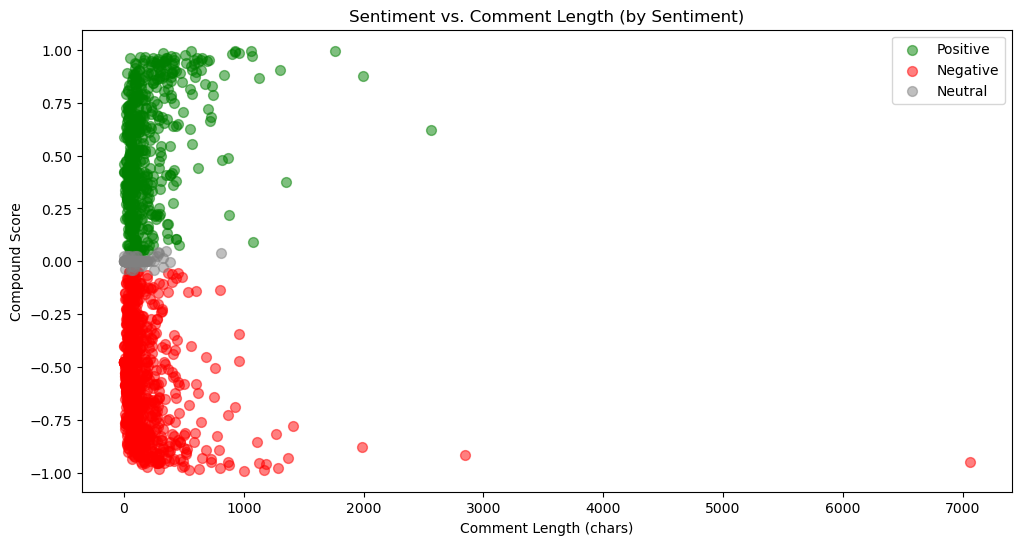

In [25]:
import matplotlib.pyplot as plt

# # 先打标签
# def get_sentiment(compound):
#     if compound >= 0.05:
#         return "Positive"
#     elif compound <= -0.05:
#         return "Negative"
#     else:
#         return "Neutral"

df['sentiment'] = df['compound'].apply(get_sentiment_label)
df['length'] = df['comment'].apply(len)

# 颜色映射
color_map = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}

plt.figure(figsize=(12, 6))

# 按情绪画散点
for sentiment, color in color_map.items():
    subset = df[df['sentiment'] == sentiment]
    plt.scatter(
        subset['length'],
        subset['compound'],
        alpha=0.5,
        s=50,
        c=color,
        label=sentiment
    )

plt.title('Sentiment vs. Comment Length (by Sentiment)')
plt.xlabel('Comment Length (chars)')
plt.ylabel('Compound Score')
plt.legend()
plt.show()



In [26]:
df = pd.DataFrame(results)

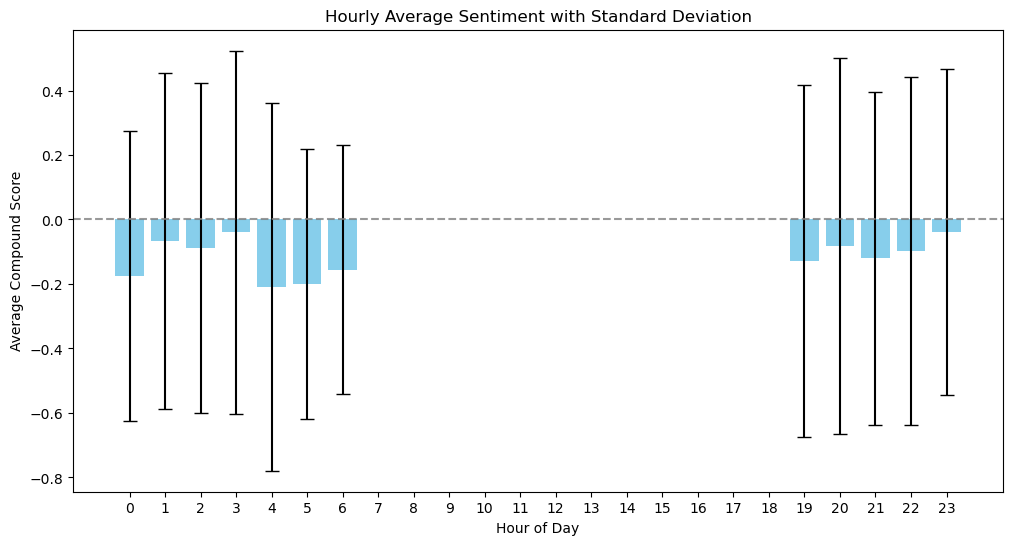

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 先分组
df['hour'] = df['create_dt'].dt.hour
grouped = df.groupby('hour')['compound'].agg(['mean', 'std']).reset_index()

# 画条形 + 方差棒
plt.figure(figsize=(12, 6))
plt.bar(grouped['hour'], grouped['mean'], yerr=grouped['std'], capsize=5, color='skyblue')

plt.axhline(0, color='gray', linestyle='--', alpha=0.8)

plt.title('Hourly Average Sentiment with Standard Deviation')
plt.xlabel('Hour of Day')
plt.ylabel('Average Compound Score')
plt.xticks(range(0, 24))  # 保证 0~23 都显示
plt.show()


In [ ]:
format